<a href="https://colab.research.google.com/github/VisarBuza/artificial-intelligence-2021-22/blob/main/assignment-three/regression/SteelIndustryEnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steel Industry Energy Consumption Dataset

This company produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

The aim is to predict the Energy Usage of Steel Industry.

The dataset can be found [here](https://www.kaggle.com/csafrit2/steel-industry-energy-consumption).

## Attribute Information:
* Date Continuous-time data taken on the first of the month
* Usage_kWh Industry Energy Consumption Continuous kWh
* Lagging Current reactive power Continuous kVarh
* Leading Current reactive power Continuous kVarh
* CO2 Continuous ppm
* NSM Number of Seconds from midnight Continuous S
* Week status Categorical (Weekend (0) or a Weekday(1))
* Day of week Categorical Sunday, Monday : Saturday
* Load Type Categorical Light Load, Medium Load, Maximum Load

### Import Libraries

In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

## Data Extraction

In [2]:
df = pd.read_csv('/Steel_industry_data.csv')

In [3]:
df.shape

(35040, 11)

In [4]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [6]:
#rename attribute
df = df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh', 
                          'CO2(tCO2)' : 'CO2'})

In [7]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

### Correlation of each variable

In [9]:
#correlation of each variable
df.corr()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


### Visualize the correlation using pearson correlation

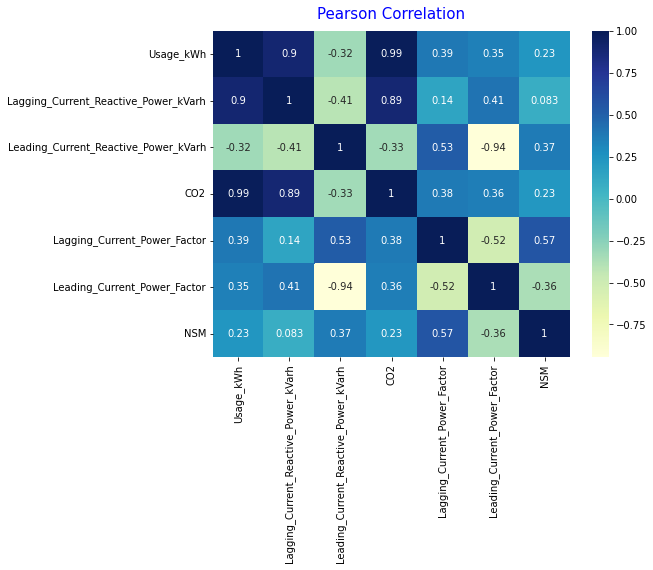

In [10]:
#visualize the correlation using pearson correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

## Exploratory Data Analysis (EDA)

In [11]:
#analyze the most energy consumption based on time
most_energy_consumption = pd.pivot_table(df, index = 'date', values = 'Usage_kWh', aggfunc = {'Usage_kWh' : np.max})
most_energy_consumption.head(10)

,Usage_kWh
date,
01/01/2018 00:00,3.42
01/01/2018 00:15,3.17
01/01/2018 00:30,4.00
01/01/2018 00:45,3.24
01/01/2018 01:00,3.31
01/01/2018 01:15,3.82
01/01/2018 01:30,3.28
01/01/2018 01:45,3.60
01/01/2018 02:00,3.60


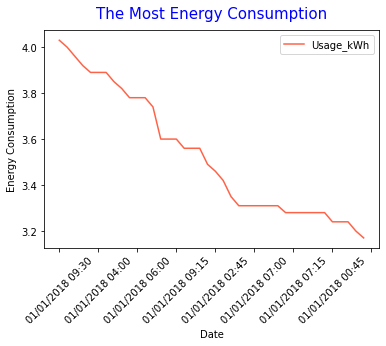

In [12]:
#visualize the most energy consumption on time
chart = most_energy_consumption[:40].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line', color = 'tomato')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, color = 'b', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

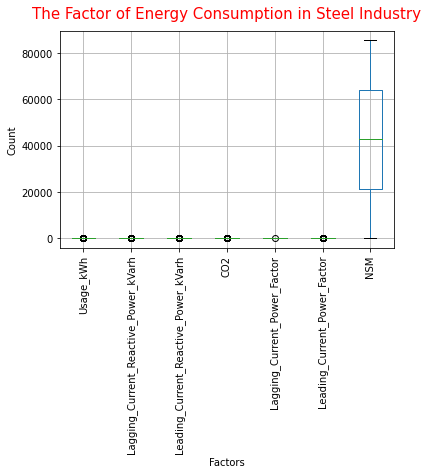

In [13]:
#analyze the factor of energy consumption
chart = df.boxplot(column = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'r', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

In [14]:
#analyze of energy consumption and NSM based on load type, day of week and week status
pd.pivot_table(df, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean})

NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Medium_Load  Friday      Weekday     61758.000000  42.220494
             Monday      Weekday     61758.000000  43.097231
             Saturday    Weekend     62218.421053  17.547648
             Sunday      Weekend     61967.647059  16.368934
             Thursday    Weekday     61758.000000  44.986200
             Tuesday     Weekday     61705.102041  45.020797
             Wednesday   Weekday     61705.102041  40.462379

In [15]:
#analyze of energy consumption and NSM based on load type, day of week and week status
pd.pivot_table(df, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean})

NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Medium_Load  Friday      Weekday     61758.000000  42.220494
             Monday      Weekday     61758.000000  43.097231
             Saturday    Weekend     62218.421053  17.547648
             Sunday      Weekend     61967.647059  16.368934
             Thursday    Weekday     61758.000000  44.986200
             Tuesday     Weekday     61705.102041  45.020797
             Wednesday   Weekday     61705.102041  40.462379

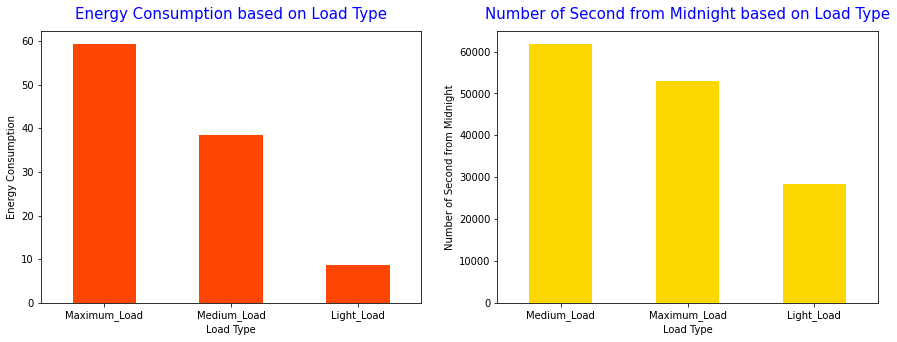

In [16]:
#visualize energy consumption based on load type
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = df.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

#visualize number of second from midnight based on load type
plt.subplot(1, 2, 2)
chart = df.groupby('Load_Type')['NSM'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'gold')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()

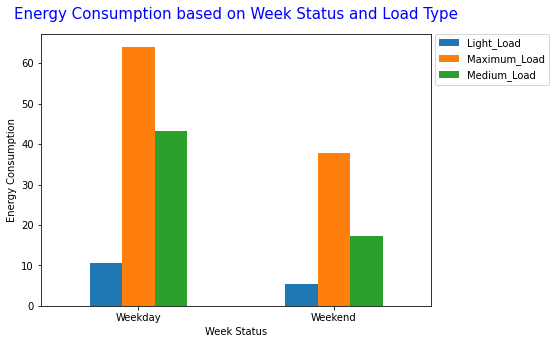

In [17]:
#visualize energy consumption based on week status and load type
plt.rcParams['figure.figsize'] = (7,5)
chart = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

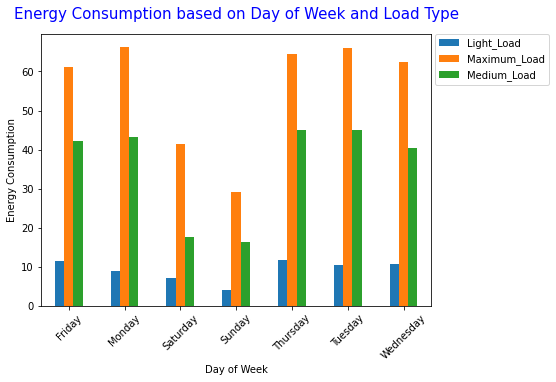

In [18]:
#visualize energy consumption based on day of week and load type
chart = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

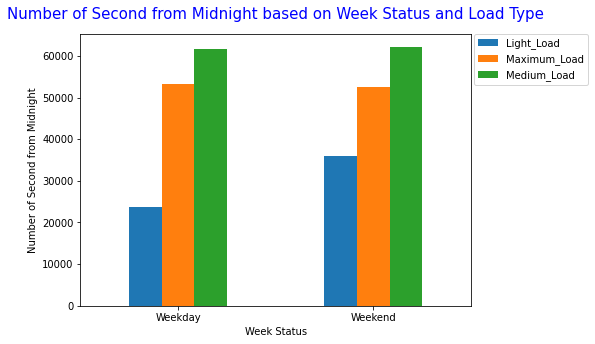

In [19]:
#visualize number of second from midnight based on week status and load type
chart = df.groupby(['WeekStatus','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

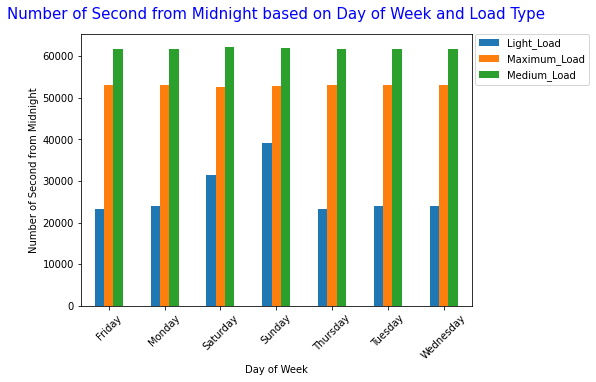

In [20]:
#visualize number of second from midnight based on day of week and load type
chart = df.groupby(['Day_of_week','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Number of Second from Midnight based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

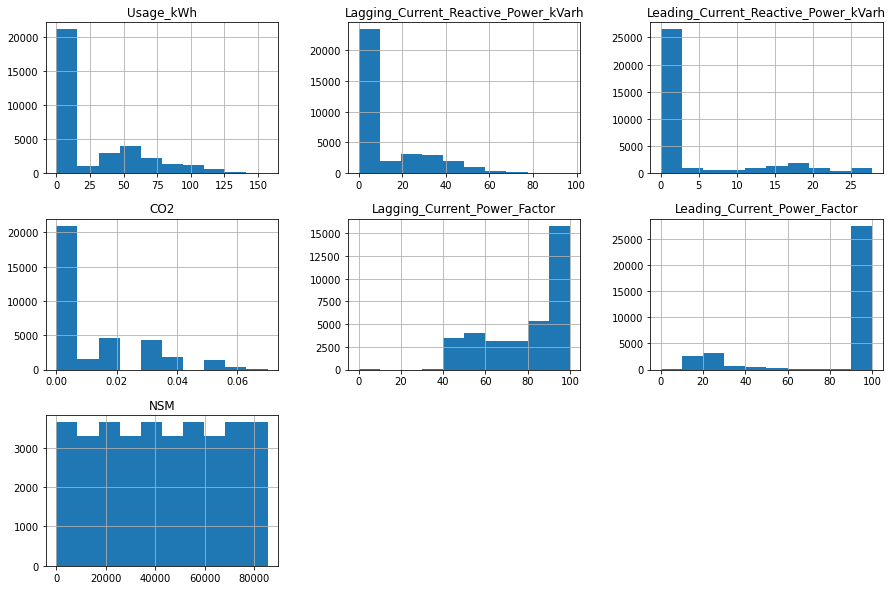

In [21]:
#distribution of each variable
df.hist(figsize = (15,10))
plt.show()

## Regression Model

### Handling categorical data

In [22]:
#indexing date
df = df.set_index('date')

#handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


### Split Data

In [23]:
#split data
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24528, 15)
(24528,)
(10512, 15)
(10512,)


###Linear Regression Model

In [24]:
#Linear Regression Model
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 17.6 ms, sys: 11.3 ms, total: 28.9 ms
Wall time: 43.2 ms


0.9841681626773734

### Ridge Regression Model

In [25]:
#Ridge Regression Model
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

CPU times: user 11.5 ms, sys: 5.09 ms, total: 16.6 ms
Wall time: 14.9 ms


0.968361386152787

### Lasso Regression Model

In [26]:
#Lasso Regression Model
lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

CPU times: user 45.1 ms, sys: 37.4 ms, total: 82.5 ms
Wall time: 50.5 ms


0.9098749972992153

Linear Regression is very suitable model to predict of energy consumption from Steel Industry because has good accuracy score on 98%

### Prediction

In [27]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[  3.09659745  70.15826234 124.42399214 ...   2.22293667   1.54271064
   3.94845762]


### MAE, MSE and RMSE

In [28]:
#check MAE, MSE and MSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error :  2.5519176087386315
Mean Squared Error :  17.76938905135436
Root Mean Squared Error :  4.215375315598169


### Visualize Model

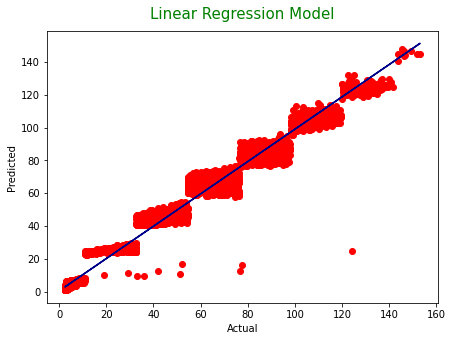

In [29]:
#visualize model
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()